### Perspective API Exploration

First, we have a dataset of Wikipedia comments made available by Jigsaw, a subsidiary of Google that created the Perspective tool. The dataset includes a unique comment id, the text of the comment, and a series of binary labels applied by human raters: "toxic," "severe_toxic," "obscene," "threat," "insult," and "identity_hate." I have appended the "score" column, which represents the toxicity score assigned to the comment text by the live version of the Perspective API. The data is available under a CC0 license.

In [170]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('labeled_and_scored_comments.csv')

In [171]:
df.sort_values(['score'])

,id,comment_text,score,toxic,severe_toxic,obscene,threat,insult,identity_hate
1158,61a85266de70cca0,Можешь говорить по русски.,0.000004,0,0,0,0,0,0
5246,030a9ba0b32b4456,Rodzina Krusenstern Potomkowie Admirała Adama ...,0.000009,0,0,0,0,0,0
11040,a6814193ac6b4705,The opening paragraph states that the game is ...,0.000091,0,0,0,0,0,0
24192,f0d6dee96e057a5b,The book is used as a source in a number of ar...,0.000116,0,0,0,0,0,0
2332,cbb9268d3c7429c1,Vals Vienés \n |Rumba \n |Cha Cha Chá(ciclo 7),0.000131,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
19994,1429a2c930688317,you fucking piece of shit,0.997278,1,1,1,0,1,0
28728,d82e45eb103ad07b,fuck off you stupid aspy asshole,0.997736,1,1,1,0,1,0
25535,e9b92c6c6b01aeef,FUCK YOU YOU PIECE OF SHIT \n FUCK YOU YOU PIE...,0.997982,1,1,1,0,1,0
25945,e783fd267f3a9d3b,FUCK WIKIPEDIA ON WHEELS! \n\nFuck off wikiped...,0.998136,1,1,1,0,1,0


I've also included a function to make calls to the Perspective API for your own testing. You will need to generate your own API key according to the instructions in the assignment.

In [172]:
from googleapiclient.discovery import build
import json

def get_toxicity_score(comment):
    
  API_KEY = '' # Put your API key here
    
  client = build(
  "commentanalyzer",
  "v1alpha1",
  developerKey=API_KEY,
  discoveryServiceUrl="https://commentanalyzer.googleapis.com/$discovery/rest?version=v1alpha1",
  static_discovery=False,
  )

  analyze_request = {
  'comment': { 'text': comment },
  'requestedAttributes': {'TOXICITY': {}}
  }
    
  response = client.comments().analyze(body=analyze_request).execute()
  toxicity_score = response["attributeScores"]["TOXICITY"]["summaryScore"]["value"]
    
  return toxicity_score

In [173]:
df.head()

,id,comment_text,score,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0001ea8717f6de06,Thank you for understanding. I think very high...,0.075638,0,0,0,0,0,0
1,000247e83dcc1211,:Dear god this site is horrible.,0.450459,0,0,0,0,0,0
2,0002f87b16116a7f,"""::: Somebody will invariably try to add Relig...",0.667964,0,0,0,0,0,0
3,0003e1cccfd5a40a,""" \n\n It says it right there that it IS a typ...",0.068434,0,0,0,0,0,0
4,00059ace3e3e9a53,""" \n\n == Before adding a new product to the l...",0.151724,0,0,0,0,0,0


Take a look at the first 5 rows from the dataset.

In [174]:
df.describe()

,score,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,41338.000000,41338.000000,41338.000000,41338.000000,41338.000000,41338.000000,41338.000000
mean,0.244467,0.095384,0.009168,0.053050,0.003024,0.049809,0.009725
std,0.257221,0.293749,0.095313,0.224137,0.054907,0.217553,0.098134
min,0.000004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.074772,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.128969,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.310894,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.998329,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Gain a general look on the dataset.

In [175]:
insult_df = df[df['insult']==1]
insult_df

,id,comment_text,score,toxic,severe_toxic,obscene,threat,insult,identity_hate
24,0013fed3aeae76b7,DJ Robinson is gay as hell! he sucks his dick ...,0.989706,1,0,1,0,1,1
29,0017d4d47894af05,":Fuck off, you anti-semitic cunt. |",0.959459,1,0,1,0,1,0
38,001eff4007dbb65b,"::No, he is an arrogant, self serving, immatur...",0.956893,1,0,1,0,1,0
59,03c1c7a2649a7d87,":::Jeez Ed, you seem like a fucking shitty dou...",0.992469,1,0,1,0,1,0
62,03c6344729c4e665,Azerbaijanis Proud of Ramil Safarov \n If I h...,0.980994,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...
41230,950289915676e6d7,you stink shoo woo woo,0.860626,1,0,0,0,1,0
41237,94f8578325d529ad,"LMAO WHAT WEAK THREATS, I HAVENT BEEN BANNED Y...",0.945277,1,1,1,0,1,0
41238,94f8302c2e339bae,"THIS IS AWFUL, JUST AWFUL!!! ALL GERMANS ARE M...",0.878531,1,0,1,0,1,1
41290,94aca26c29f7a0bd,"Hypocritical, double standard admins, as typic...",0.833779,0,0,0,0,1,0


In [176]:
toxic_df = df[df['toxic']==1]
toxic_df

,id,comment_text,score,toxic,severe_toxic,obscene,threat,insult,identity_hate
8,00091c35fa9d0465,"== Arabs are committing genocide in Iraq, but ...",0.635929,1,0,0,0,0,0
24,0013fed3aeae76b7,DJ Robinson is gay as hell! he sucks his dick ...,0.989706,1,0,1,0,1,1
29,0017d4d47894af05,":Fuck off, you anti-semitic cunt. |",0.959459,1,0,1,0,1,0
37,001d739c97bc2ae4,How dare you vandalize that page about the HMS...,0.564152,1,0,0,0,0,0
38,001eff4007dbb65b,"::No, he is an arrogant, self serving, immatur...",0.956893,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
41297,94a6beeb87ab68c0,"Damn, those are some rancid sources.",0.821990,1,0,1,0,0,0
41299,94a5024323152cd1,"==Why does it bother you, fuckface?89.123.100....",0.989706,1,0,1,0,1,0
41325,948cb4052152869b,WHAT? That's past stuff. Stop being an insti...,0.515460,1,0,0,0,0,0
41332,9481cd7393b583c9,"RE: \n\nIt's a fucking album cover, how the fu...",0.932649,1,0,1,0,0,0


In [177]:
 df[(df['toxic'] & df['insult']) == 1]

,id,comment_text,score,toxic,severe_toxic,obscene,threat,insult,identity_hate
24,0013fed3aeae76b7,DJ Robinson is gay as hell! he sucks his dick ...,0.989706,1,0,1,0,1,1
29,0017d4d47894af05,":Fuck off, you anti-semitic cunt. |",0.959459,1,0,1,0,1,0
38,001eff4007dbb65b,"::No, he is an arrogant, self serving, immatur...",0.956893,1,0,1,0,1,0
59,03c1c7a2649a7d87,":::Jeez Ed, you seem like a fucking shitty dou...",0.992469,1,0,1,0,1,0
62,03c6344729c4e665,Azerbaijanis Proud of Ramil Safarov \n If I h...,0.980994,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...
41209,9513624a1e1a84cf,SparkyFox: Fuck you asswipes,0.981012,1,0,1,0,1,0
41230,950289915676e6d7,you stink shoo woo woo,0.860626,1,0,0,0,1,0
41237,94f8578325d529ad,"LMAO WHAT WEAK THREATS, I HAVENT BEEN BANNED Y...",0.945277,1,1,1,0,1,0
41238,94f8302c2e339bae,"THIS IS AWFUL, JUST AWFUL!!! ALL GERMANS ARE M...",0.878531,1,0,1,0,1,1


According to what got above, there are 1923 comments being identified both as toxic and insult comments, which is about 4.7% of the total numbers of comments.

In [178]:
new_set = df[(df['toxic'] & df['insult']) == 1]

<AxesSubplot:xlabel='id'>

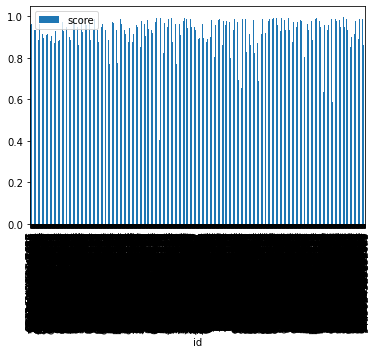

In [179]:
new_set.plot.bar(x='id', y='score')

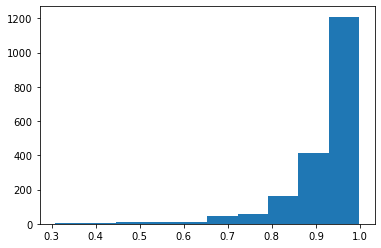

In [180]:
plt.hist(new_set['score'])
plt.show()

Visualize the selected data.

In [181]:
new_set.describe()

,score,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,1923.000000,1923.0,1923.000000,1923.000000,1923.000000,1923.0,1923.000000
mean,0.919526,1.0,0.170567,0.803952,0.041602,1.0,0.171087
std,0.088039,0.0,0.376228,0.397108,0.199729,0.0,0.376683
min,0.307727,1.0,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.896419,1.0,0.000000,1.000000,0.000000,1.0,0.000000
50%,0.949331,1.0,0.000000,1.000000,0.000000,1.0,0.000000
75%,0.978331,1.0,0.000000,1.000000,0.000000,1.0,0.000000
max,0.998329,1.0,1.000000,1.000000,1.000000,1.0,1.000000


By observing the plot and descrption, I found out that the mean score for the new set is much higher than the mean in original dataset. Besides, the summary indicates that comments that are labeled as 'toxic' and 'insult' also have a high probability of being labeled as 'obscene'. Which, it could say that words used for 'toxic and insult' are also easily used in obscene.

In [182]:
threshold = 0.919526

In [183]:
new_set[new_set['score']>= 0.919526]

,id,comment_text,score,toxic,severe_toxic,obscene,threat,insult,identity_hate
24,0013fed3aeae76b7,DJ Robinson is gay as hell! he sucks his dick ...,0.989706,1,0,1,0,1,1
29,0017d4d47894af05,":Fuck off, you anti-semitic cunt. |",0.959459,1,0,1,0,1,0
38,001eff4007dbb65b,"::No, he is an arrogant, self serving, immatur...",0.956893,1,0,1,0,1,0
59,03c1c7a2649a7d87,":::Jeez Ed, you seem like a fucking shitty dou...",0.992469,1,0,1,0,1,0
62,03c6344729c4e665,Azerbaijanis Proud of Ramil Safarov \n If I h...,0.980994,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...
41134,957c327ace7d9896,how can it be almost certain when it has been ...,0.948421,1,0,1,0,1,0
41181,95390a4e0cd90ad3,"Fuck You Asshole \n\nFuck You, you cum-guzzlin...",0.991540,1,1,1,0,1,0
41209,9513624a1e1a84cf,SparkyFox: Fuck you asswipes,0.981012,1,0,1,0,1,0
41237,94f8578325d529ad,"LMAO WHAT WEAK THREATS, I HAVENT BEEN BANNED Y...",0.945277,1,1,1,0,1,0


In [184]:
new_set[new_set['score']< 0.919526]

,id,comment_text,score,toxic,severe_toxic,obscene,threat,insult,identity_hate
123,07e0fe7770ca2abe,Bill \n\n \n\n \n\n \n dear \n sir \n\n \n...,0.913934,1,0,0,0,1,1
143,0bc799a58279849f,I knew he was a dirty jew.,0.909082,1,0,0,0,1,1
240,137df37e25c41d7a,""" (UTC) \n\n Stupid! """"ß"""" is a ligature of sz...",0.843952,1,0,0,0,1,0
291,16d2c7fba677c4ce,rather than a stupid one,0.887998,1,0,0,0,1,0
315,1a17976be8da3231,""" 2007 (UTC) \n\n :Dude, saying stuff like \n...",0.918381,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
41037,9604971ad1b7001c,you can blok em all yo want fagget because tru...,0.827926,1,0,1,0,1,0
41062,95ddf8be1b12c559,"In defence of China! \n\nHey Koreans, who the ...",0.915653,1,0,1,0,1,1
41114,958fce5a67048b4f,I HATE THIS GUY HE IS SOME INTERNET THUG THAT ...,0.860626,1,0,0,0,1,0
41230,950289915676e6d7,you stink shoo woo woo,0.860626,1,0,0,0,1,0


As the result shown above, among the comments with 'toxic' and 'insult' lables, about 2/3 is actually above the threshold. 

**API test**:

Here I want to know would use lowercase or uppercase to write the comment lead to getting different results in the toxic insult field. And since people often use the uppercase form to represent their stronger emotions, my hypothesis is that comments in uppercase form would generate a higher score in the system.

The test includes the comparison between the lowercase and uppercase forms of the swearwords that are being used widely in insult/toxic tweets on Twitter. The results will also be compared to the mean score (threshold) gained previously under the 'new_set.describe()' section. The test also includes the comment sample from the 'toxic&insult' dataset (new_set).

***Most popular swearwords in insult/toxic tweets on Twitter***

Resource from: https://www.fastcompany.com/3026596/140-characters-of-fck-sht-and-ss-how-we-swear-on-twitter

In [185]:
comment_list = ['fuck', 'shit', 'asshole', 'bitch', 'nigga', 'hell', 'whore', 'dick', 'piss', 'pussy']

for comment in comment_list:
    score = get_toxicity_score(comment)
    print(comment, score)
    time.sleep(1)

fuck 0.9017833
shit 0.7007861
asshole 0.89158845
bitch 0.9254919
nigga 0.7007861
hell 0.31671798
whore 0.78524166
dick 0.59863794
piss 0.39284727
pussy 0.6955873


In [186]:
comment_list = ['FUCK', 'SHIT', 'ASSHOLE', 'BITCH', 'NIGGA', 'HELL', 'WHORE', 'DICK', 'PISS', 'PUSSY']

for comment in comment_list:
    score = get_toxicity_score(comment)
    print(comment, score)
    time.sleep(1)

FUCK 0.9320454
SHIT 0.8546526
ASSHOLE 0.91406596
BITCH 0.95068264
NIGGA 0.7593913
HELL 0.27856
WHORE 0.7569718
DICK 0.5958905
PISS 0.3905958
PUSSY 0.7816909


In this part of the test, most of the results show that words in uppercase would get a higher toxic score. Words like 'fuck' are even over the threshold (0.919526) when it switches to uppercase. However, there are 3 out of 10 in this test, which is shown as a lower score after the word switches to uppercase form. And the false rate for this part is 30%.

It is also surprising to notice that popular swearwords used on Twitter like 'hell'(0.31671798), 'piss'(0.39284727) got a much lower score compared with others and even the threshold (0.919526).

***Comments from the dataset***

sample #1

In [187]:
new_set['comment_text'][31505]

'OH DEAR ! HOW FRIGHTENING. IT TAKES ALL OF TEN SECONDS TO GET ANOTHER IP ADDRESS ASSHOLE.'

In [188]:
get_toxicity_score('OH DEAR ! HOW FRIGHTENING. IT TAKES ALL OF TEN SECONDS TO GET ANOTHER IP ADDRESS ASSHOLE.')

0.867151

In [189]:
get_toxicity_score('oh dear ! how frightening. it takes all of ten seconds to get another ip address asshole.')

0.8269591

sample #2

In [190]:
new_set['comment_text'][41230]

'you stink shoo woo woo'

In [191]:
get_toxicity_score('you stink shoo woo woo')

0.7007861

In [192]:
get_toxicity_score('YOU STINK SHOO WOO WOO')

0.62792164

sample #3

In [193]:
new_set['comment_text'][29]

':Fuck off, you anti-semitic cunt.  |'

In [194]:
get_toxicity_score(':Fuck off, you anti-semitic cunt.  |')

0.9728165

In [195]:
get_toxicity_score(':FUCK OFF, YOU ANTI-SEMITIC CUNT.  |')

0.97926265

sample #4

In [196]:
new_set['comment_text'][143]

'I knew he was a dirty jew.'

In [197]:
get_toxicity_score('I knew he was a dirty jew.')

0.8546526

In [198]:
get_toxicity_score('I KNEW HE WAS A DIRTY JEW.')

0.8393344

sample #5

In [199]:
new_set['comment_text'][24]

'DJ Robinson is gay as hell! he sucks his dick so much!!!!!'

In [200]:
get_toxicity_score('DJ Robinson is gay as hell! he sucks his dick so much!!!!!')

0.96751314

In [201]:
get_toxicity_score('DJ ROBINSON IS GAY AS HELL! HE SUCKS HIS DICK SO MUCH!!!!!')

0.9728165

sample #6

In [202]:
new_set['comment_text'][5550]

'Wikipedia is gay suck on that!!!!!!!!!!!!!'

In [203]:
get_toxicity_score('Wikipedia is gay suck on that!!!!!!!!!!!!!')

0.96751314

In [204]:
get_toxicity_score('WIKIPEDIA IS GAY SUCK ON THAT!!!!!!!!!!!!!')

0.9728165

sample #7

In [205]:
new_set['comment_text'][24188]

"GO FIND A GIRLFRIEND \n\nI'LL GIVE U VANDALISM MOTHER FUCKER!\nGO FIND A GIRLFRIEND AND DO NOT CHANGE THINGS!\nDEPRESSED!"

In [206]:
get_toxicity_score("GO FIND A GIRLFRIEND \n\nI'LL GIVE U VANDALISM MOTHER FUCKER!\nGO FIND A GIRLFRIEND AND DO NOT CHANGE THINGS!\nDEPRESSED!")

0.95068264

In [207]:
get_toxicity_score("go find a girlfriend \n\ni'll give u vandalism mother fucker!\ngo find a girlfriend and do not change things!\ndepressed!")

0.9358428

sample  #8

In [208]:
new_set['comment_text'][30420]

'Hey, CambridgeBayWeather, quit being suck a fucking homo and get a fucking life instead of just sitting around and making sure nobody fucks with wikipedia. Fuck you, and quit editing MY page you fucking homo motherfucker.'

In [209]:
get_toxicity_score('Hey, CambridgeBayWeather, quit being suck a fucking homo and get a fucking life instead of just sitting around and making sure nobody fucks with wikipedia. Fuck you, and quit editing MY page you fucking homo motherfucker.')

0.96176314

In [210]:
get_toxicity_score('HEY, CAMBRIDGEBAYWEATHER, QUIT BEING SUCK A FUCKING HOMO AND GET A FUCKING LIFE INSTEAD OF JUST SITTING AROUND AND MAKING SURE NOBODY FUCKS WITH WIKIPEDIA. FUCK YOU, AND QUIT EDITING MY PAGE YOU FUCKING HOMO MOTHERFUCKER.')

0.9728165

sample #9

In [211]:
new_set['comment_text'][38127]

'Congrats for being a total fucking faggot.'

In [212]:
get_toxicity_score('Congrats for being a total fucking faggot.')

0.95473075

In [213]:
get_toxicity_score('CONGRATS FOR BEING A TOTAL FUCKING FAGGOT.')

0.96176314

sample #10

In [214]:
new_set['comment_text'][6475]

'STOP POSTING WARNIGN ON MY TALK PAGE ITS FUCKING GAY AS SHIT AND I DONT GIVE A FUCK JESUS CHIRST'

In [215]:
get_toxicity_score('STOP POSTING WARNIGN ON MY TALK PAGE ITS FUCKING GAY AS SHIT AND I DONT GIVE A FUCK JESUS CHIRST')

0.9728165

In [216]:
get_toxicity_score('stop posting warnign on my talk page its fucking gay as shit and i dont give a fuck jesus chirst')

0.96176314

In part II, I run a toxicity score test on 10 samples from the dataset that are labeled as 'toxic' and 'insult'. 8 of them get a higher toxicity score in the uppercase form. Yet, not all of them show an increase score in uppercase form. Sample 2 and 4 decrease by 0.07 and 0.15 point after switching into uppercase. And the false rate for this part of the test is 20%.

Overall, based on what got in the two parts of the test, I would say that the hypothesis has been proved. But since there are still some of the samples showing a different result than predicted, I believe there is still a bias in the system. By observing those who got a lower score in uppercase, one possible cause could be that these swearwords are less common and contain a indirect insult feeling, compared with swearwords like 'fuck'.

One way I think that can improve the test's accuracy can be increase the numbers of samples participating in the test. For example, the overall false rate for the test is 25%. But it could be affected by the small test numbers (20). The rate may change if the numbers expand to hundreds, thousdands. 